<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
from torch import nn

import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import torchmetrics
from torchmetrics import Accuracy, ConfusionMatrix, Precision, Recall, F1Score

import matplotlib.pyplot as plt

In [3]:
device = 'cpu'
device

'cpu'

## Get a Dataset

In [4]:
# Setup training data

train_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=False,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.6MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Check Data

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]

In [7]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [9]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_labels = train_data.class_to_idx
class_labels

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Plot the image

Image Shape: torch.Size([1, 28, 28])
Label: 9 (Ankle boot)


Text(0.5, 1.0, 'Ankle boot')

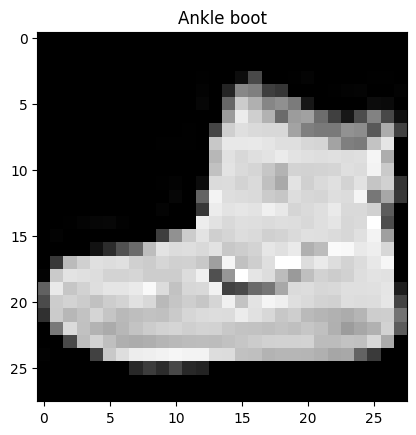

In [11]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
print(f"Label: {label} ({classes[label]})")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{classes[label]}")

## Prepare DataLoader

In [12]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [13]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7deaaaeb1b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7deaab5d1e90>)

In [14]:
# Let's check the instances of dataloader

print(f"DataLoader: {train_dataloader}\n")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32\n")
print(f"Type of train dataloader: {type(train_dataloader)}\n")

DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7deaaaeb1b50>

Length of train dataloader: 1875 batches of 32

Type of train dataloader: <class 'torch.utils.data.dataloader.DataLoader'>



In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape: torch.Size([1, 28, 28])
Label: tensor([8]) (Bag)


(-0.5, 27.5, 27.5, -0.5)

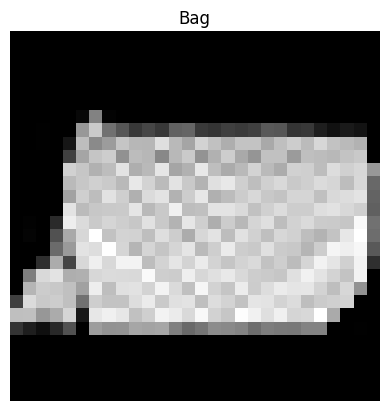

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1])
img, lbl = train_features_batch[random_idx][0], train_labels_batch[random_idx]
print(f"Image Shape: {img.shape}")
print(f"Label: {lbl} ({classes[lbl]})")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"{classes[lbl]}")
plt.axis(False)

## Create a model

#### Model 0: Baseline Model

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
sample = train_features_batch[0]

# Flatten the sample
flatten_model(sample)

print(sample.shape) # [color, height, width]
print(flatten_model(sample).shape) # [color, height*width]

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [18]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup the model with parameter
model_0 = FashionMNISTModelV0(input_shape=28*28,
                               hidden_units=10,
                               output_shape=len(classes)).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch Repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [21]:
# Import Accuracy Metric
from helper_functions import accuracy_fn

In [22]:
# Loss Function & Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### Creating a function to time our experiments

In [23]:
from timeit import default_timer as timer
def print_train_time(start, end, device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

#### Train Loop

In [24]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0

  for batch,  (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_preds = model_0(X)

    loss = loss_fn(y_preds, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f}")

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_preds = model_0(X)

      test_loss += loss_fn(test_preds, y)

      test_accuracy = accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))
      test_acc += test_accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test loss: {test_loss:.5f}")
  print(f"Test accuracy: {test_acc:.5f}")

train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039
Test loss: 0.50954
Test accuracy: 82.03874
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633
Test loss: 0.47989
Test accuracy: 83.19688
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503
Test loss: 0.47664
Test accuracy: 83.42652
Train time on None: 33.077 seconds


33.07672530499997

#### Make Predictions

In [25]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = 'cpu'):

  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_preds = model(X)

      loss += loss_fn(y_preds, y)

      acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [26]:
eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Improve The Model

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [28]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

model_1 = FashionMNISTModelV1(input_shape=28*28,
                               hidden_units=10,
                               output_shape=len(classes)).to(device)

model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
                      [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
                      [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
                      ...,
                      [-0.0325,  0.0155,  0.0087,  ...,  0.0257,  0.0291,  0.0243],
                      [-0.0006,  0.0088,  0.0018,  ..., -0.0147,  0.0053, -0.0194],
                      [-0.0170,  0.0233, -0.0098,  ...,  0.0283, -0.0033,  0.0255]])),
             ('layer_stack.1.bias',
              tensor([ 0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,  0.0069, -0.0078,
                       0.0002,  0.0307])),
             ('layer_stack.3.weight',
              tensor([[ 0.2109,  0.1079, -0.2279, -0.1063,  0.2019,  0.2847, -0.1495,  0.1344,
                       -0.0740,  0.2006],
                      [-0.0475, -0.2514, -0.3130, -0.0118,  0.0932, -0.1864,  0.

In [29]:
# Loss fn and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [30]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0

  for batch,  (X, y) in enumerate(train_dataloader):

    X = X.to(device)
    y = y.to(device)

    model_1.train()

    y_preds = model_1(X)

    loss = loss_fn(y_preds, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f}")

  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:

      X = X.to(device)
      y = y.to(device)

      test_preds = model_1(X)

      test_loss += loss_fn(test_preds, y)

      test_accuracy = accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))
      test_acc += test_accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test loss: {test_loss:.5f}")
  print(f"Test accuracy: {test_acc:.5f}")

train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.62518
Test loss: 0.58734
Test accuracy: 79.44289
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.46817
Test loss: 0.46961
Test accuracy: 83.08706
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.43819
Test loss: 0.45408
Test accuracy: 83.70607
Train time on None: 31.339 seconds


31.339229622000005

#### Making function for train and test loop

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X ,y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss_fn(y_pred, y)
    train_acc  += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f}")
  print(f"Train accuracy: {train_acc:.5f}")

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():

    for X, y, in data_loader:

      X, y = X.to(device), y.to(device)

      test_preds = model(X)

      test_loss += loss_fn(test_preds, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss:.5f}")
  print(f"Test accuracy: {test_acc:.5f}")

In [32]:
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_time_start = timer()
  train_results = train_step(model=model_1,
                             data_loader=train_dataloader,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             accuracy_fn=accuracy_fn)
  test_results = test_step(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
  train_time_end = timer()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.42130
Train accuracy: 84.78833
Test loss: 0.45070
Test accuracy: 84.12540
Epoch: 1
-------
Train loss: 0.41060
Train accuracy: 85.18667
Test loss: 0.45874
Test accuracy: 83.81589
Epoch: 2
-------
Train loss: 0.40186
Train accuracy: 85.37833
Test loss: 0.44529
Test accuracy: 84.57468


In [33]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [34]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [35]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [36]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4452923536300659,
 'model_acc': 84.57468051118211}

# Convolutional Neural Network (CNN)

In [37]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [38]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(classes)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Trying to visualize output of each layers

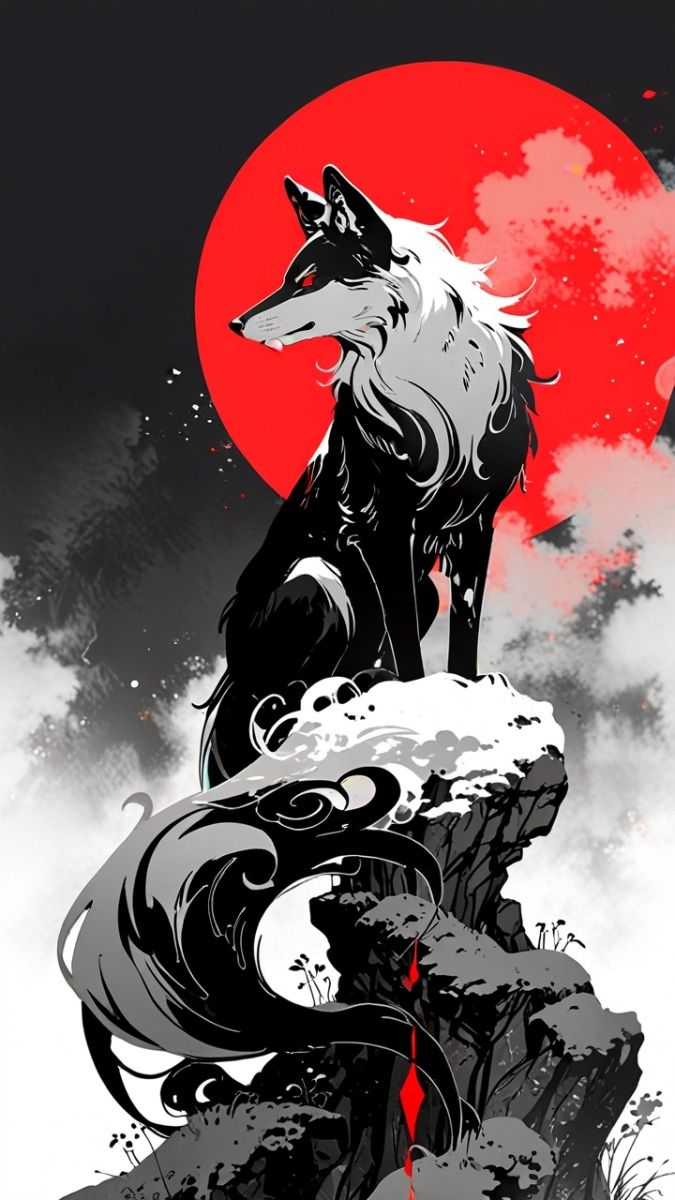

In [40]:
from PIL import Image
import numpy as np

img = Image.open("4562171879ff83a41718bc18318b7078.jpg")
img

In [41]:
img_tensor = torch.from_numpy(np.array(img))
img_tensor.shape

torch.Size([1200, 675, 3])

In [42]:
img_tensor_reshaped = img_tensor.permute(2,0,1)
img_tensor_reshaped.shape

torch.Size([3, 1200, 675])

In [43]:
img_tensor_reshaped = img_tensor_reshaped.to(torch.float32) # It was unsigned char

## Stepping through nn.Conv2d()

In [44]:
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)

conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

In [45]:
conv_output = conv_layer(img_tensor_reshaped)
conv_output.shape

torch.Size([10, 1198, 673])

## Stepping through ReLU()

In [46]:
relu_layer = nn.ReLU()
relu_layer

ReLU()

In [47]:
relu_output = relu_layer(conv_output)
relu_output.shape

torch.Size([10, 1198, 673])

## Stepping through MaxPool2d()

In [48]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
maxpool_layer

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [49]:
maxpool_output = maxpool_layer(relu_output)
maxpool_output.shape

torch.Size([10, 599, 336])

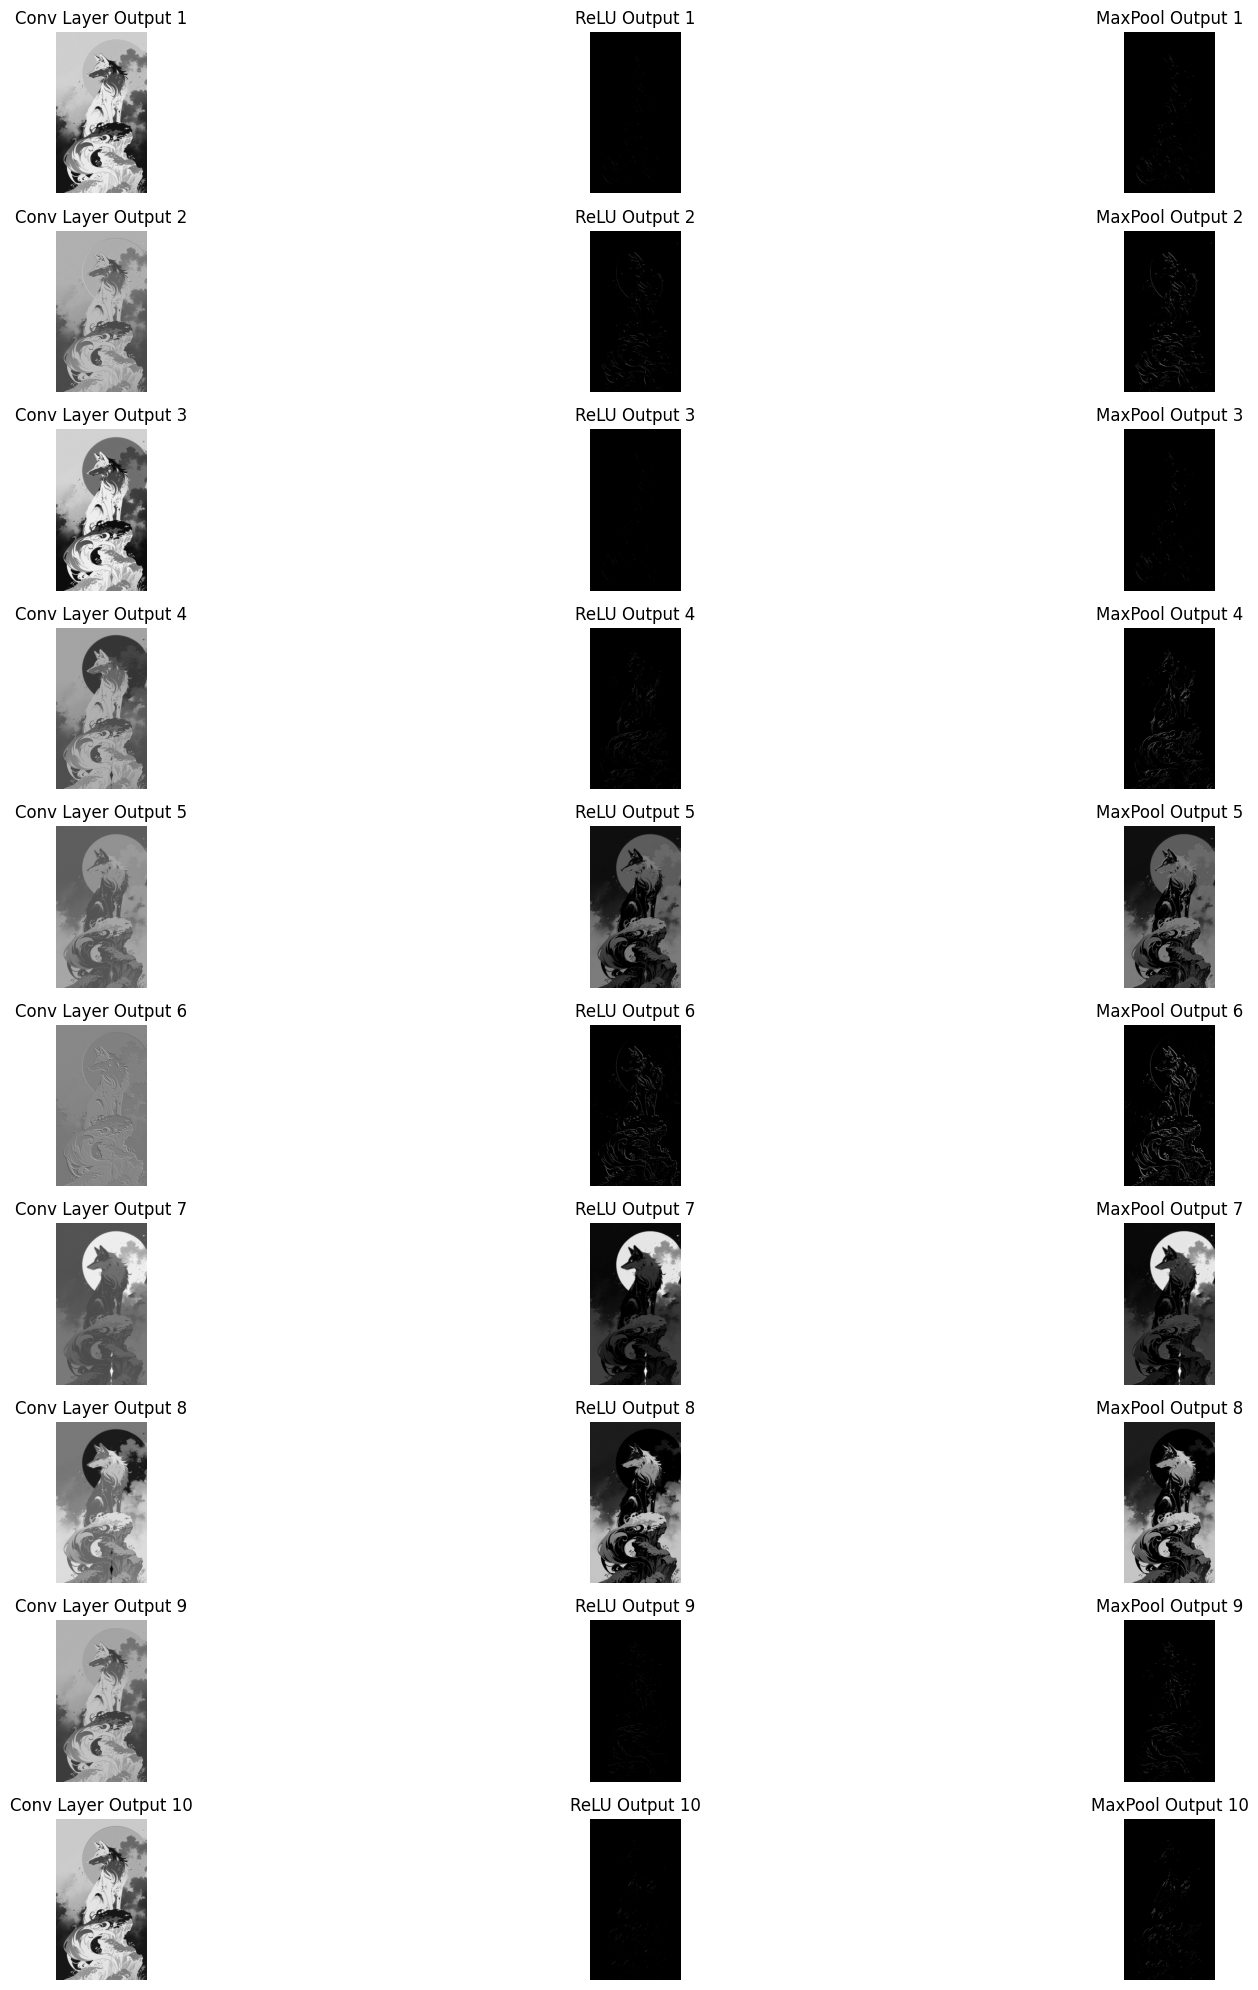

In [50]:
# Remove batch dimension and convert to NumPy
conv_output_np = conv_output.detach().numpy()
relu_output_np = relu_output.detach().numpy()
maxpool_output_np = maxpool_output.detach().numpy()

# Select a few feature maps to visualize (e.g., first 5 channels)
num_channels_to_show = 10
fig, axes = plt.subplots(num_channels_to_show, 3, figsize=(20, 20))

for i in range(num_channels_to_show):
    axes[i, 0].imshow(conv_output_np[i], cmap="gray")
    axes[i, 0].set_title(f"Conv Layer Output {i+1}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(relu_output_np[i], cmap="gray")
    axes[i, 1].set_title(f"ReLU Output {i+1}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(maxpool_output_np[i], cmap="gray")
    axes[i, 2].set_title(f"MaxPool Output {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()